In [1]:
import pandas as pd

In [2]:
!pip install fbprophet

In [2]:
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv(r'C:\Users\Shin\Desktop\for-kr-pjt\NoonMap-Project\data\file_data\최종_db_교량_높이_보완.csv')

In [11]:
df

,Unnamed: 0,obs_date_wl,station_code,station_name,obs_date_rf,pp_station,rainfall,bridge_name,brid_height_origin,WL,bridge_height
0,0,2016-12-31 23:00:00,1007604,안성시(한평교),2016-12-31 22:00:00,10074080,0.0,한평교,6.1,146.0,163.072466
1,1,2016-12-31 22:00:00,1007604,안성시(한평교),2016-12-31 21:00:00,10074080,0.0,한평교,6.1,146.0,163.072466
2,2,2016-12-31 21:00:00,1007604,안성시(한평교),2016-12-31 20:00:00,10074080,0.0,한평교,6.1,146.0,163.072466
3,3,2016-12-31 20:00:00,1007604,안성시(한평교),2016-12-31 19:00:00,10074080,0.0,한평교,6.1,146.0,163.072466
4,4,2016-12-31 19:00:00,1007604,안성시(한평교),2016-12-31 18:00:00,10074080,0.0,한평교,6.1,146.0,163.072466
...,...,...,...,...,...,...,...,...,...,...,...
5977290,5977290,2013-01-01 05:00:00,1101670,평택시(동연교),2013-01-01 04:00:00,11014070,0.0,동연교(청북),13.0,241.0,266.396912
5977291,5977291,2013-01-01 04:00:00,1101670,평택시(동연교),2013-01-01 03:00:00,11014070,0.0,동연교(청북),13.0,241.0,266.396912
5977292,5977292,2013-01-01 03:00:00,1101670,평택시(동연교),2013-01-01 02:00:00,11014070,0.0,동연교(청북),13.0,241.0,266.396912
5977293,5977293,2013-01-01 02:00:00,1101670,평택시(동연교),2013-01-01 01:00:00,11014070,0.0,동연교(청북),13.0,241.0,266.396912


In [75]:
df.isna().sum()

Unnamed: 0            0
obs_date_wl           0
station_code          0
station_name          0
obs_date_rf           0
pp_station            0
rainfall              0
bridge_name           0
brid_height_origin    0
WL                    0
bridge_height         0
dtype: int64

In [27]:
station_code_list = pd.unique(df['station_code']).tolist()

In [47]:
station_name_list = pd.unique(df['station_name']).tolist()

In [50]:
bridge_name_list = pd.unique(df['station_name']).tolist()

In [31]:
df_list = [df[df['station_code']==i] for i in station_code_list]

In [32]:
for i in range(len(station_code_list)):
    df_list[i] = split_df[i].drop(columns=['Unnamed: 0', 'station_code', 'station_name', 'obs_date_rf', 'pp_station', 'rainfall',
                          'bridge_name', 'brid_height_origin', 'bridge_height'])
    df_list[i].rename({'obs_date_wl':'ds', 'WL':'y'}, axis=1, inplace=True)

In [35]:
import logging

In [36]:
logging.getLogger('fbprophet').setLevel(logging.WARNING)

In [37]:
from fbprophet import Prophet

In [38]:
m_list = [Prophet() for i in range(len(station_code_list))]

In [40]:
for i in range(len(station_code_list)):
    m_list[i].fit(df_list[i])

In [66]:
future_list = [m_list[i].make_future_dataframe(periods=365, freq='H') for i in range(len(station_code_list))]

In [67]:
future_list[0].tail()

,ds
33337,2020-08-30 17:00:00
33338,2020-08-30 18:00:00
33339,2020-08-30 19:00:00
33340,2020-08-30 20:00:00
33341,2020-08-30 21:00:00


In [68]:
forecast_list = [m_list[i].predict(future_list[i]) for i in range(len(station_code_list))]

In [69]:
forecast_list[0].tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
33337,2020-08-30 17:00:00,292.275247,318.806237,389.952632,291.714327,292.383346,61.644620,61.644620,61.644620,-0.127891,...,-1.420596,-1.420596,-1.420596,63.193107,63.193107,63.193107,0.0,0.0,0.0,353.919867
33338,2020-08-30 18:00:00,292.305051,320.255769,387.749818,291.740726,292.413517,61.924061,61.924061,61.924061,-0.099572,...,-1.260096,-1.260096,-1.260096,63.283728,63.283728,63.283728,0.0,0.0,0.0,354.229111
33339,2020-08-30 19:00:00,292.334854,317.461706,394.402909,291.767685,292.443688,62.236128,62.236128,62.236128,-0.042140,...,-1.095651,-1.095651,-1.095651,63.373919,63.373919,63.373919,0.0,0.0,0.0,354.570982
33340,2020-08-30 20:00:00,292.364658,316.946953,391.850014,291.783120,292.473860,62.522398,62.522398,62.522398,-0.013572,...,-0.927708,-0.927708,-0.927708,63.463678,63.463678,63.463678,0.0,0.0,0.0,354.887056
33341,2020-08-30 21:00:00,292.394461,317.560185,389.952739,291.782315,292.504031,62.757547,62.757547,62.757547,-0.038707,...,-0.756751,-0.756751,-0.756751,63.553005,63.553005,63.553005,0.0,0.0,0.0,355.152008


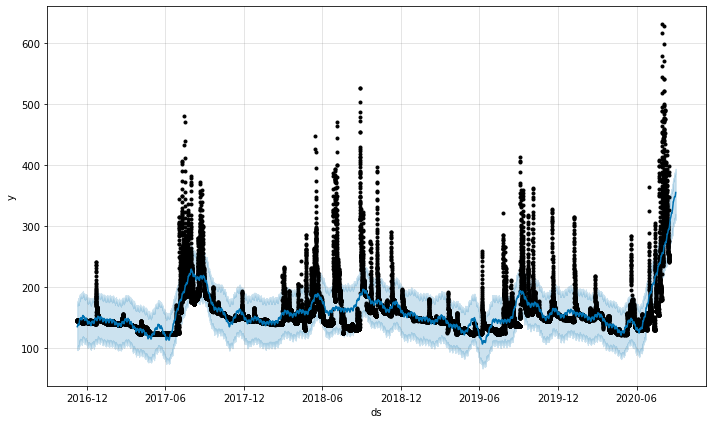

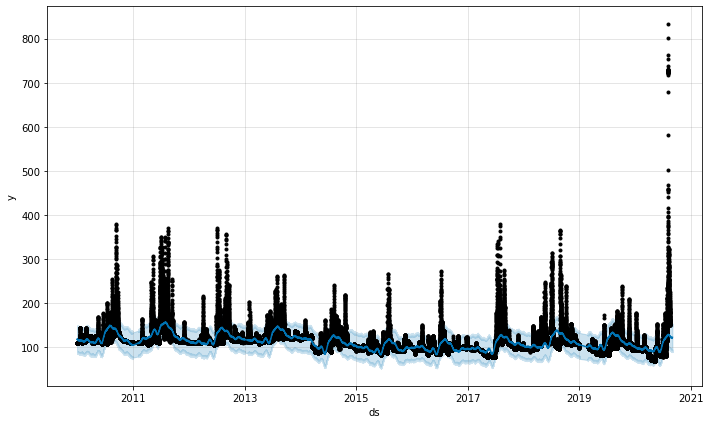

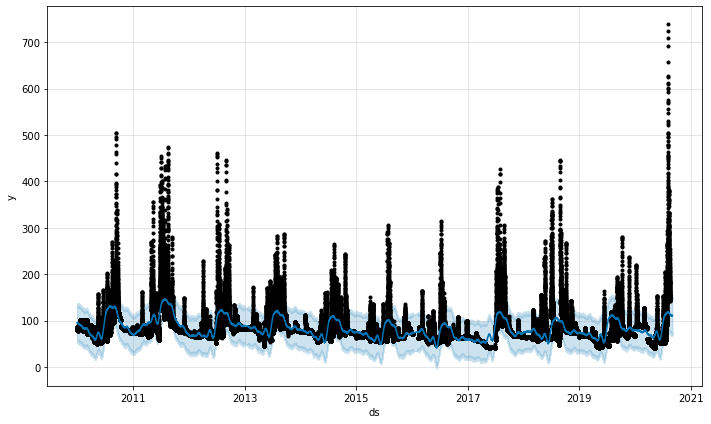

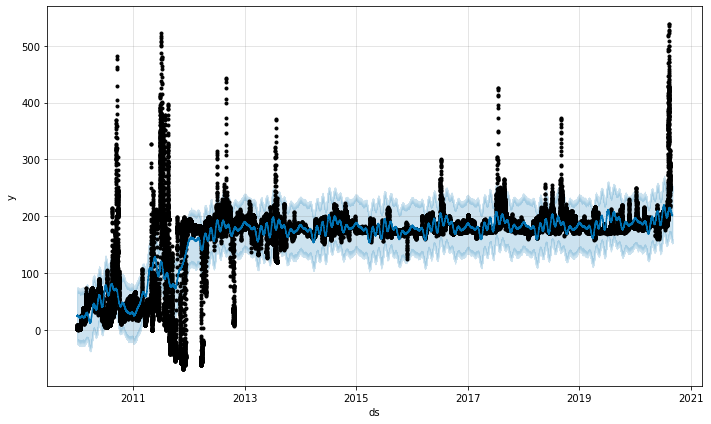

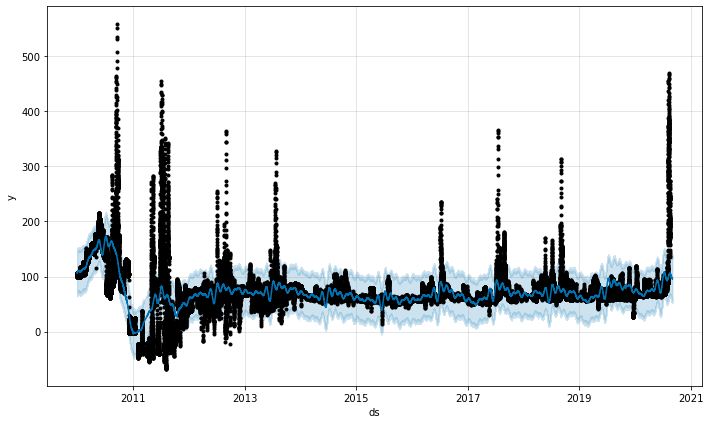

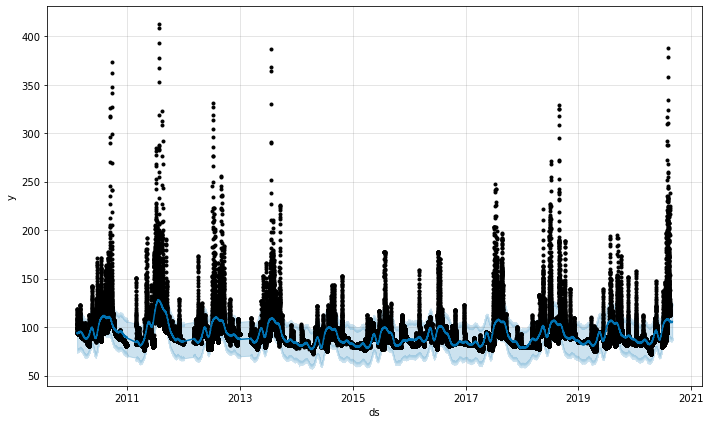

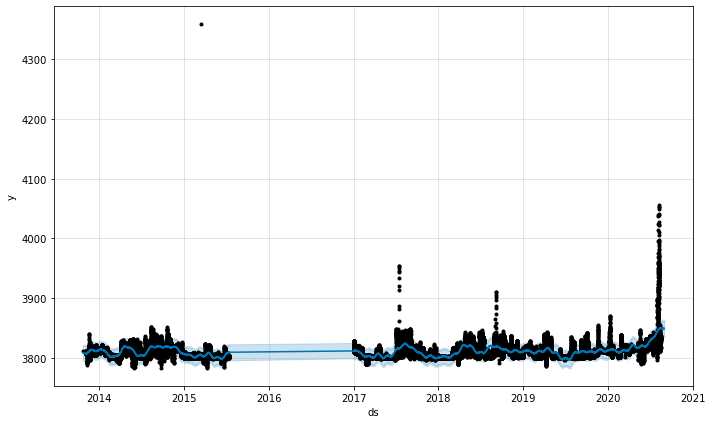

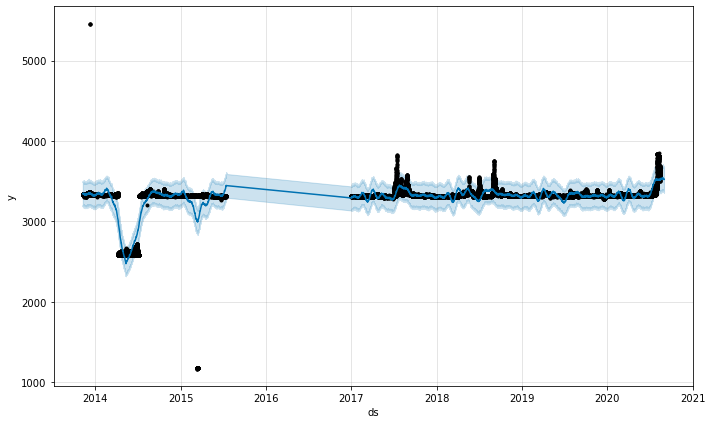

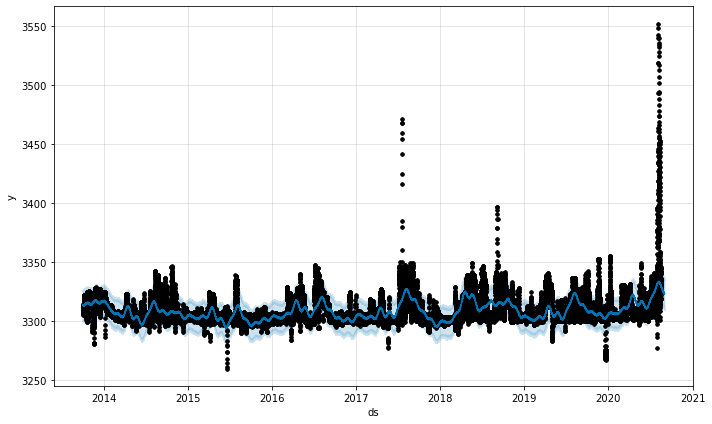

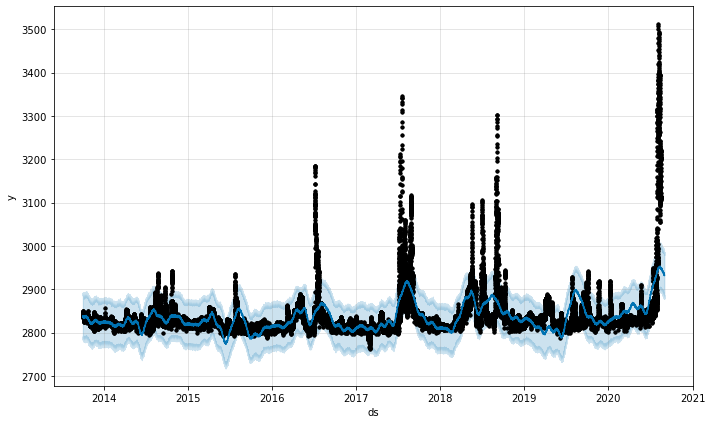

In [79]:
for i in range(10):
    m_list[i].plot(forecast_list[i])

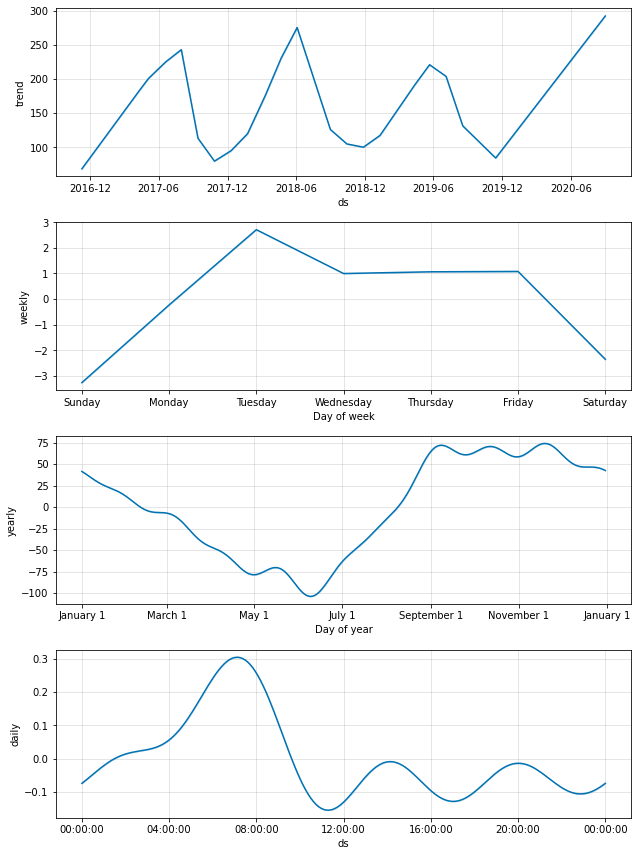

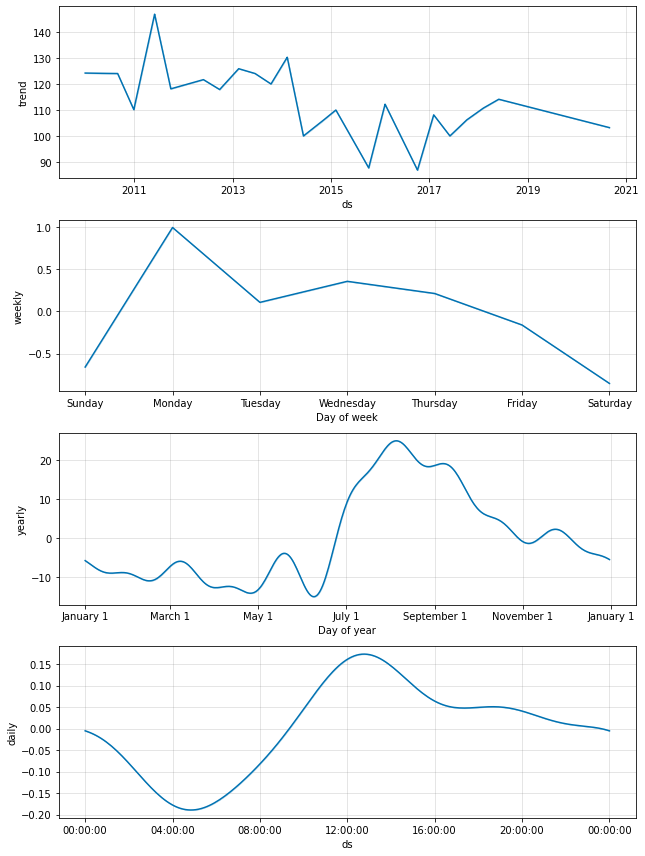

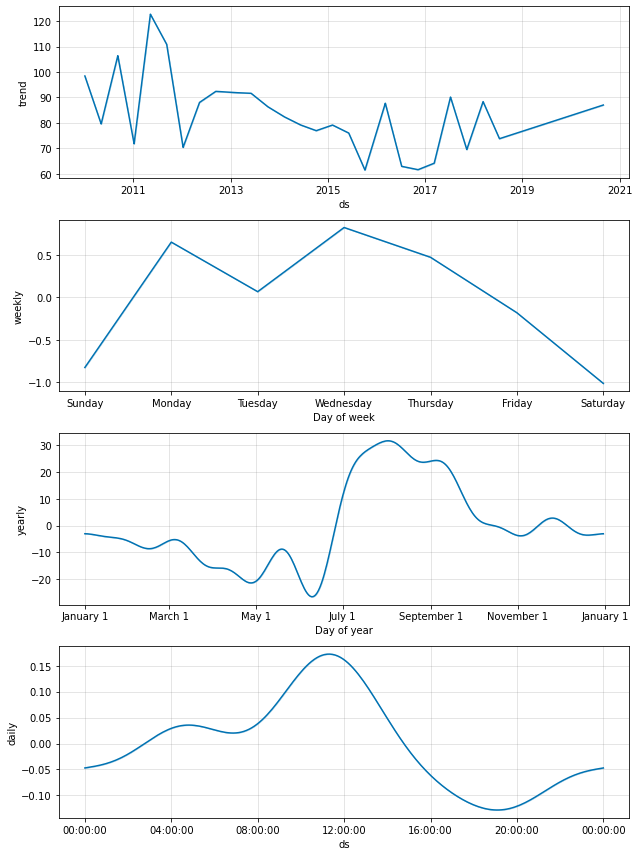

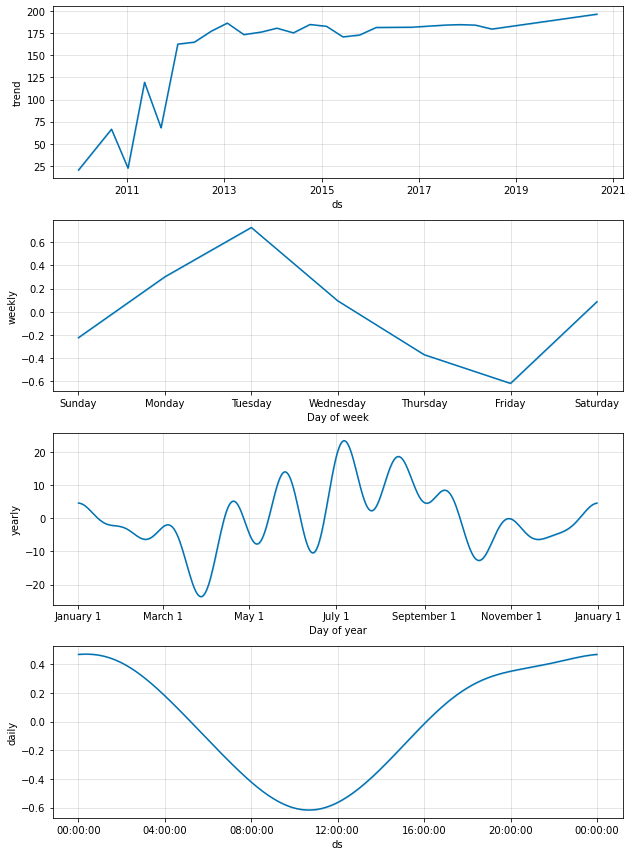

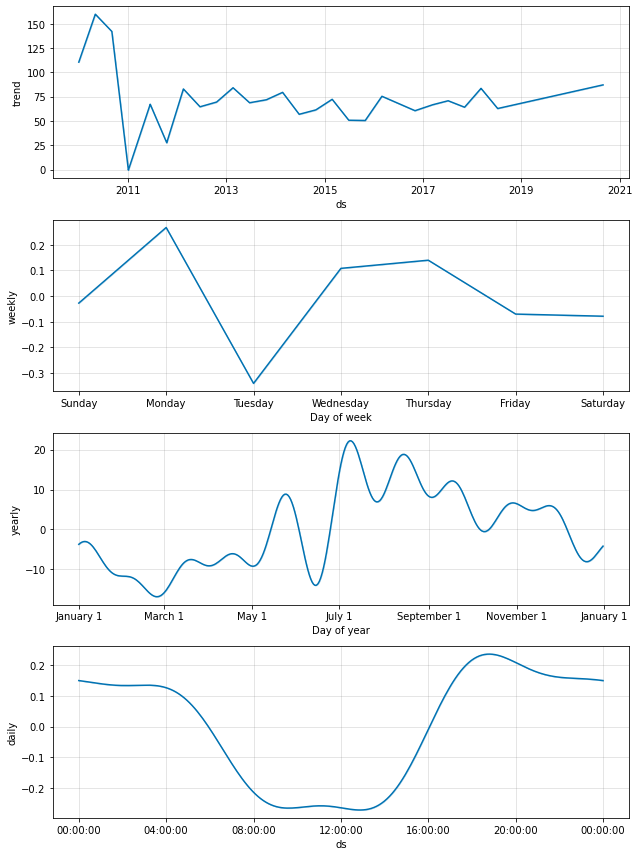

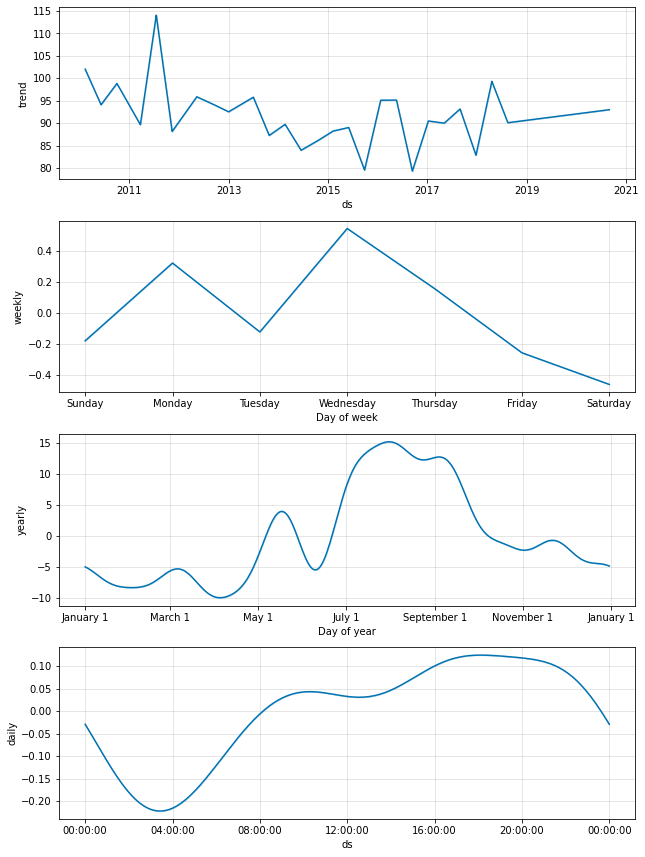

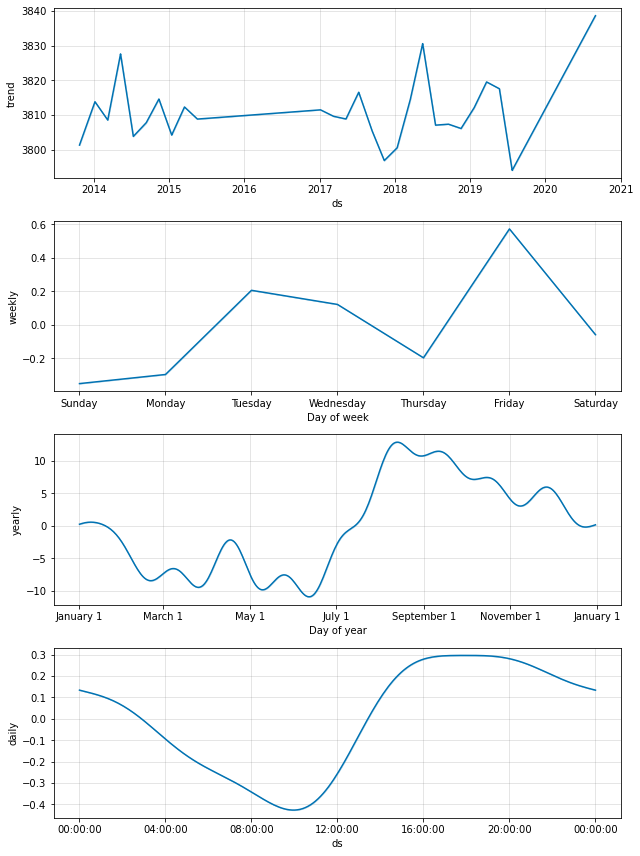

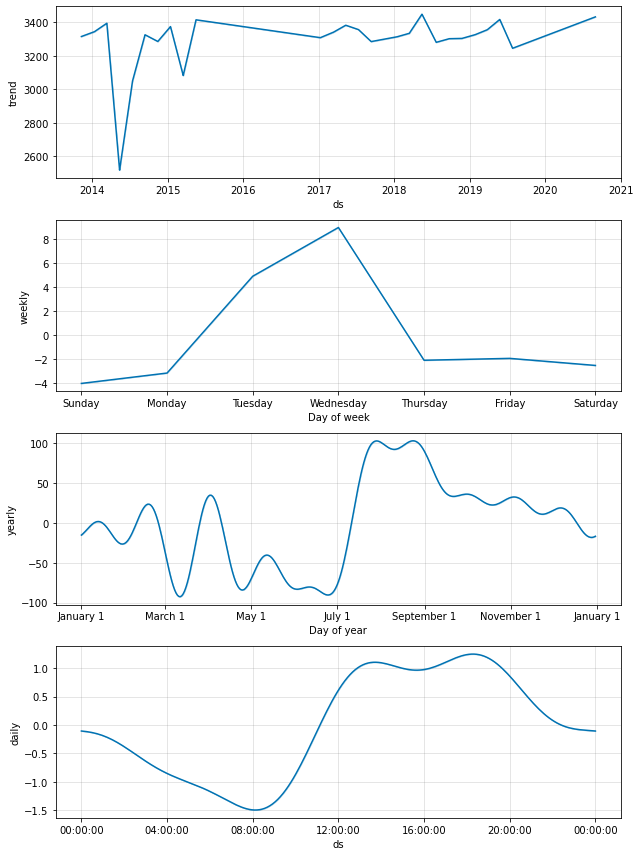

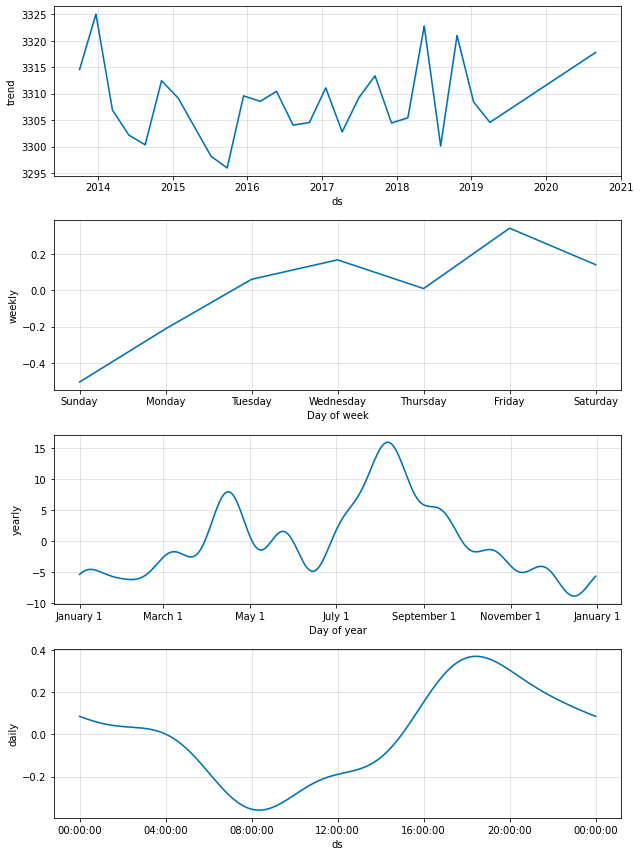

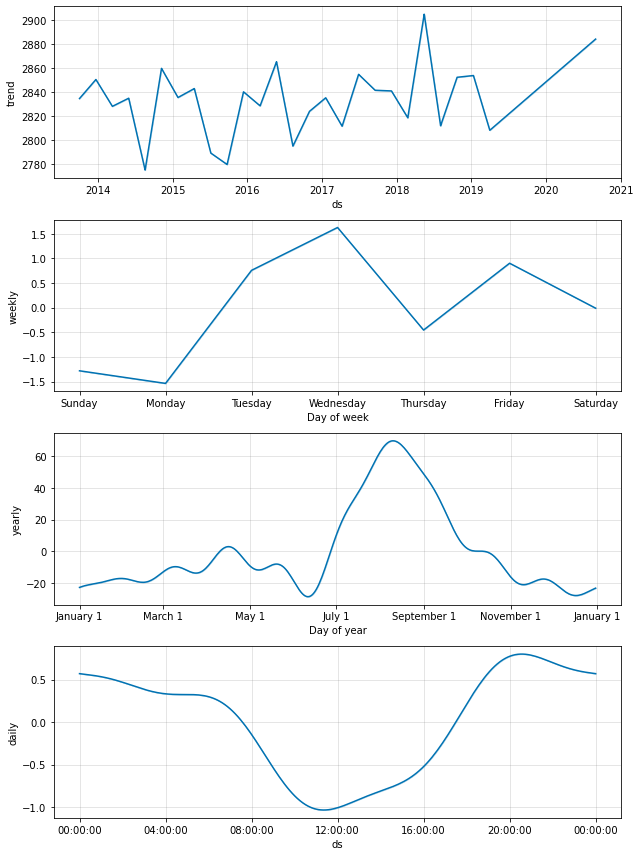

In [80]:
for i in range(10):
    m_list[i].plot_components(forecast_list[i])

In [78]:
# 전체적으로 너무 완만한 결과가 나옴